Lab Task -1

        Refer attached dataset of drug2.CSV
        Train a linear regression model (C) as (response~dose+ sex+dose*sex), improvement through interaction.
       Observe the model statistics (p-value, t-value, std. error, magnitude of coefficient, R2 , adj-R2 , SSE, RMSE, F-value, etc )
       Plot the error and see is it Gaussian?
       Plot predicted value vs error and see is it in desired form?
       Plot predicted value vs actual value and see is it in desired form?
       Now apply training and testing in real sense, .i.e., divide the dataset training (70%) and testing (30%). Now, observe the testing and training RMSE error etc…
        Plot the error and see is it Gaussian?
        Plot predicted value vs error and see is it in desired form?
        Plot predicted value vs actual value and see is it in desired form?

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [58]:
df = pd.read_csv('drug2.csv')
dose_sex = []
for i in range(len(df)):
    dose_sex.append(df.dose[i]*df.response[i])
df['Dose_Sex']=dose_sex    
print(df.head())
x = df[['sex','dose','Dose_Sex']]
y = df['response']


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.6)


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics

print("\nRoot Mean Square Error : ",np.sqrt(mean_squared_error(y_test, predictions.tolist())))
print('\n')
print(model.summary())




   sex  dose  response  Dose_Sex
0    1   0.1     13.75     1.375
1    1   0.2     12.90     2.580
2    1   0.3     19.26     5.778
3    1   0.4     20.34     8.136
4    1   0.5     19.97     9.985

Root Mean Square Error :  13.398975994390886


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.729e+04
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:37:56   Log-Likelihood:                -5052.5
No. Observations:                1280   AIC:                         1.011e+04
Df Residuals:                    1277   BIC:                         1.013e+04
Df Model:                           3                                         
Covariance Type:            nonrobust      

In [31]:
d = {'Real Value':y_test,'Predicted Value':predictions.tolist(),'Error':np.subtract(y_test,predictions.tolist())}
Pred = pd.DataFrame(data=d)
print(Pred.head(20))


      Real Value  Predicted Value      Error
830        93.04        86.327647   6.712353
292       259.42       274.943232 -15.523232
1597       35.68        47.339538 -11.659538
938        16.27        12.527549   3.742451
1829       93.12        85.386343   7.733657
755        20.70        20.056725   0.643275
2263      185.64       167.464344  18.175656
2074      212.17       203.121916   9.048084
1561       22.73        23.255059  -0.525059
123        16.16         7.687249   8.472751
2073      212.56       201.407946  11.152054
1850      147.37       128.656648  18.713352
2002       19.84        57.579854 -37.739854
1369       26.63        28.531940  -1.901940
3113        9.26         3.678794   5.581206
214        48.52        65.378612 -16.858612
1428       90.61        83.817451   6.792549
1082      235.22       234.710239   0.509761
1121       11.09         6.116644   4.973356
2023       79.89        76.967026   2.922974


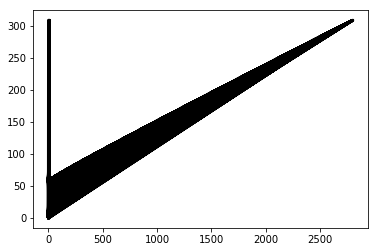

In [54]:
plt.plot(X_test,predictions.tolist(), color='black', linewidth=3)


(array([222., 231., 302., 209., 118., 134., 124.,  58.,  87.,  85., 153.,
         49.,  17.,  16.,  11.,  22.,  12.,   7.,  15.,   1.,   9.,  18.,
          5.,   7.,   5.,   3.]),
 array([1.17798963e-02, 1.79617118e+00, 3.58056246e+00, 5.36495374e+00,
        7.14934502e+00, 8.93373630e+00, 1.07181276e+01, 1.25025189e+01,
        1.42869101e+01, 1.60713014e+01, 1.78556927e+01, 1.96400840e+01,
        2.14244753e+01, 2.32088666e+01, 2.49932578e+01, 2.67776491e+01,
        2.85620404e+01, 3.03464317e+01, 3.21308230e+01, 3.39152142e+01,
        3.56996055e+01, 3.74839968e+01, 3.92683881e+01, 4.10527794e+01,
        4.28371707e+01, 4.46215619e+01, 4.64059532e+01]),
 <a list of 26 Patch objects>)

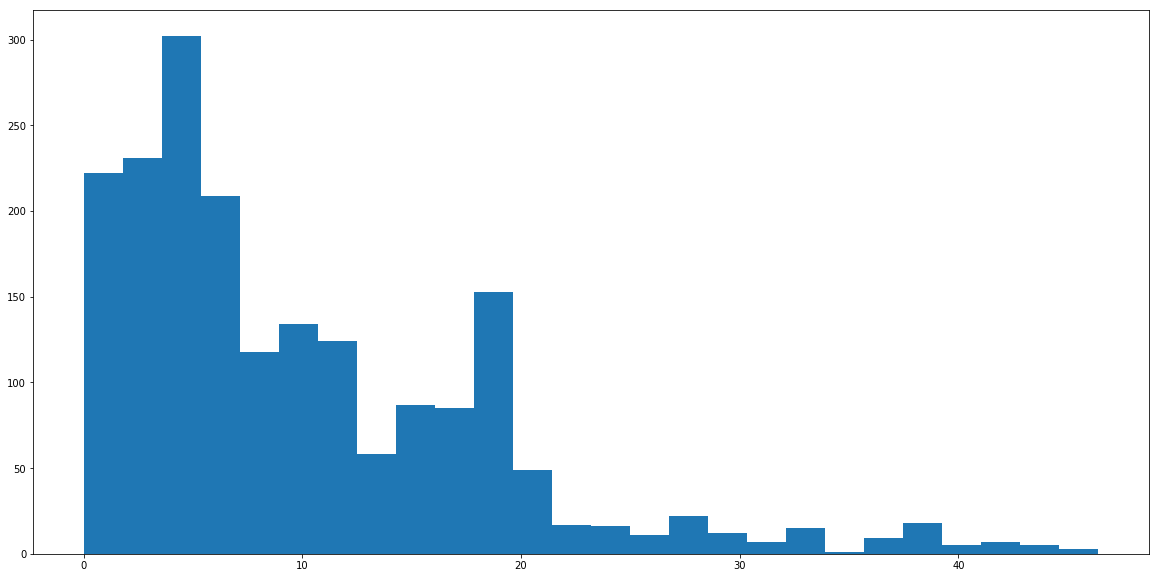

In [43]:
#Gaussian Plot to check error distribution
error = Pred.Error.tolist()
error = [abs(error[i]) for i in range(len(Pred))]
plt.figure(figsize=(20,10))
plt.hist(error,bins='auto')